<a href="https://colab.research.google.com/github/rhqtmfajfl/python-study/blob/master/tensorflow/%5B%EB%B3%B4%EB%84%88%EC%8A%A41%5Dtf_data%2C_functionalAPI0702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow로 모델링하는 2가지 방법
1. `Sequential` 모델링을 활용하는 방법
  * keras에서 제공하는 레이어들을 이어 붙여 가면서 모델링하는 방법
  * 쉽고 빠르게 모델링이 가능하다.
  * 레이어들에 대한 커스터마이징이 조금 힘들다.
2. `Functional API`를 활용하는 방법
  * 개발자가 직접 레이어를 정의해서 keras의 레이어처럼 사용하게 할 수 있다.(`tf.keras.layers` 상속)
  * 기타 평가 방식이나 Loss, Optimizer 등등을 직접 정의해서 사용할 수 있다.

# tf.data 사용하기
* 일반적인 배열이 아닌, 병렬 처리 된 배열을 이용하여 매우 빠른 속도로 데이터의 입출력이 가능하게 된다.
* `dataset`이라는 개념을 이용해서 `feature`, `label`을 손쉽게 관리할 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

In [ ]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()  # feature labe, feature label

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[...,tf.newaxis]

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train.shape, x_test.shape # 4차원 데이터

((60000, 28, 28, 1), (10000, 28, 28, 1))

## tf.data의 함수들
* `from_tensor_slices()` : `feature`, `label`을 합친 데이터세트(**ds**) 를 생성
* `shuffle()` : 데이터 세트에 있는 데이터를 랜덤하게 섞어줌
* `batch()` : 배치 생성하기

In [ ]:
# 데이터 세트를 만드는 과정을 제너레이트 라고 한다.
# 데이터 세트를 제너레이트할 데이터를 넣어 준다. 데이터를 병렬로 처리하 수 있게 된다. (속도가 매우빨라 진다..)

train_ds =tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 튜플로 x_train이랑 y_train을 넣어준다.

#데이터 섞기
train_ds = train_ds.shuffle(1024) #매개변수에 들어가는 숫자는 랜덤 시드가 아닌 랜덤을 생성하기 위한 버퍼 사이즈(1kb를 일반적으로 설정함.)
#잠깐 데이터가 머문다.

#배치 생성
train_ds = train_ds.batch(32) # iteration 할 때마다 batch_size 만큼 데이터가 나온다. (여기서는 32)  반복할때마다 32개씩 나온다.


In [ ]:
#테스트 ds 만들기
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

#테스트 세트는 셔플이 필요 없다. 배치만 설정해 주자.
test_ds = test_ds.batch(32)#반복할때 마다 32개씩 나온다.


`take()` 함수를 이용하면 데이터를 (이미 정해진) 배치 사이즈 만큼 데이터를 꺼내올 수 있다.

In [ ]:
for images, labels in train_ds.take(1): # take를 이용하면 배치를 볓개 꺼내올지 알 수 있따.
  print(images.shape, labels.shape)

(32, 28, 28, 1) (32,)


In [ ]:
for images, labels in train_ds.take(3): # take를 이용하면 배치를 볓개 꺼내올지 알 수 있따.
  print(images.shape, labels.shape)

(32, 28, 28, 1) (32,)
(32, 28, 28, 1) (32,)
(32, 28, 28, 1) (32,)


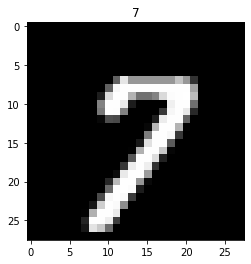

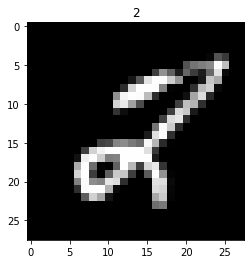

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(2):
  image = images[0,...,0]
  label = labels.numpy()[0]

  plt.title(label)
  plt.imshow(image, cmap='gray')
  plt.show()

## tf.data를 이용해서 Sequantial 모델 훈련하기


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D#Feature Extraction Layers  #, Flatten, Dense
from tensorflow.keras.layers import Flatten, Dense # Fully Connected Layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout  # Dropout 계산양을 줄여준다.

model = Sequential([
                    ###### Feature Extraction ####
                    Conv2D(filters = 32, kernel_size = 3, padding='SAME', input_shape=(28,28,1), activation='relu'), #KERNEL SIZE 필터의 크기
                    # Conv2D(32,3 padding='SAME', input_sahpe=(28,28,1), activation='relu') #으로도 가능
                    Conv2D(filters = 32, kernel_size = 3, padding='SAME', activation='relu'),
                    MaxPool2D(pool_size =(2,2)),

                    Dropout(0.25), #25%의 데이터를 사용하지 않겠다라는 의미
                    # 가중치를 0으로 만들 데이터의 비율 지정(사용하지 않을 데이터의 비율 지정) - 과대적합 방지

                    Conv2D(filters =64, kernel_size=3, padding='SAME', activation='relu'),
                    Conv2D(filters =64, kernel_size=3, padding='SAME', activation='relu'),
                    MaxPool2D(pool_size=(2,2)),

                    Dropout(0.25),

                   ##### Fully Connected #####
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# tf.data를 이용해서 훈련
model.fit(train_ds, epochs=1)

# @tf.function
* `Functional API`에서 가장 많이 사용되는 데코레이터 패턴, Tensorflow 세션( 계산그래프 )에서 관리하는 함수가 될 수 있도록 해준다.
* `@tf.function`이 붙은 함수는 계산그래프가 모두 그려지고나서 실제 학습이 되면서 수행되기 때문에 `Tensorflow`의 리소스를 이용할 수 있게 된다.
* 학습 및 테스트하는 함수에 붙는다.

In [ ]:
# #tf.function은 functional API에서가장많이 사용되는데코레이터 패턴, Tensorflow 세션(계산그래프) 에서
# 관리하는 함수가 될수 있도록 해준다.


In [ ]:
# # Loss Fuction
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# # Optimizer
# optimizer = tf.keras.optimizers.Adam()

# # Train/ Test Loss를 평균으로 관리
# train_loss = tf.keras.metrics.Mean(name='train_loss')
# train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

# test_loss = tf.keras.metrics.Mean(name='test_loss')
# test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# @tf.function
# def train_step(images, labels):
#   #데이터와 레이블을 따로따로 불러온다.
#   # 텐서플로우에 역전파를 이용한 자동 미분 수행을 위한 환경만들기(이런 시스템이 존재한다.)
#   # loss를 구하는 과정
#   # 어떤 미분 환경안에서 loss를 구하는 것을 만들면 된다.
#   #그렇다면loss함수가필요하다.
#   # loss를 구해야 오차 역전파를 구할 수있다.


# ###미분을 하기위한 준비과정######################
#   with tf.GradientTape() as tape: #테입이란 객체로 미분을 한다.
#     # 무엇에 대한 미분을 할 것인가 자동 미분 수행을 위한 환경
#     #1. 예측
#     prediction = model(images) # 모델이 훈련 모드가 된다. 훈련모드의 모델이 된다. 

#     #2. loss 구하기
#     loss = loss_object(labels, prediction)
#   ########################여기까지 설정 부분 미분 준비과정

# #3. 오차역전파 수행(grads : 수정되어야할 기울기 백터)
#   grads = tape.gradient(loss, model.trainable_variables) # model.trainable_variables : 가중치, 편향 정보 (갱신이 가능한 ...) 
# # 각 매개변수별로 기울기가 등장 한다.

# #4. 최적화(apply_gradients : 매개변수 갱신)
#   optimizer.apply_gradients(zip(grads, model.trainable_variables))

# #여기나오는 변수나 함수 외우고 있어야 한다.

# #loss, accuracy 기록
#   trian_loss(loss)
#   train_accuracy(labels, prediction)

In [ ]:
# Loss Function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer
optimizer = tf.keras.optimizers.Adam()

# Train / Test Loss를 평균으로 관리
train_loss = tf.keras.metrics.Mean(name='train_loss') 
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
  # 자동 미분 수행을 위한 환경 만들기
  #  loss를 구하는 과정
  with tf.GradientTape() as tape: # 미분 준비 과정
    # 1. 예측
    prediction = model(images) # 모델이 훈련 모드가 된다.

    # 2. loss 구하기
    loss = loss_object(labels, prediction)

  # 3. 오차 역전파 수행 ( grads : 수정 되어야할 기울기 벡터 )
  grads = tape.gradient(loss, model.trainable_variables) # model.trainable_variables : 가중치, 편향 정보 ( 갱신이 가능한 ... )

  # 4. 최적화 (apply_gradients : 매개변수 갱신) 
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

  # loss, accuracy 기록
  train_loss(loss)
  train_accuracy(labels, prediction)

In [ ]:
#전이학습 내 다른 사람들의 가중치를 가지고 오겠다.

In [ ]:
# @tf.function
# def test_step(images, labels):
#   prediction = model(images)
#   t_loss = loss_object(labels, prediction)

#   test_loss(t_loss)
#   test_accuracy(labels, prediction)

In [ ]:
@tf.function
def test_step(images, labels):
  prediction = model(images)
  t_loss = loss_object(labels, prediction)

  test_loss(t_loss)
  test_accuracy(labels, prediction)

모델 재실행

In [ ]:
# model = Sequential([
                    
#   ##### Feature Extraction #####
#   Conv2D(filters=32, kernel_size=3, padding='SAME', input_shape=(28, 28, 1), activation='relu'),
#   Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
#   MaxPool2D(pool_size=(2, 2)),

#   Dropout(0.25), # 가중치를 0으로 만들 데이터의 비율 지정(사용하지 않을 데이터의 비율 지정) - 과대적합 방지

#   Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
#   Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
#   MaxPool2D(pool_size=(2, 2)),

#   Dropout(0.25),

#   ##### Fully Connected #####
#   Flatten(),
#   Dense(512, activation='relu'),
#   Dense(10, activation='softmax')])

# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
model = Sequential([
                    
  ##### Feature Extraction #####
  Conv2D(filters=32, kernel_size=3, padding='SAME', input_shape=(28, 28, 1), activation='relu'),
  Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  Dropout(0.25), # 가중치를 0으로 만들 데이터의 비율 지정(사용하지 않을 데이터의 비율 지정) - 과대적합 방지

  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=(2, 2)),

  Dropout(0.25),

  ##### Fully Connected #####
  Flatten(),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)         

In [ ]:
# epochs = 10

# for epoch in range(epochs):
#   # 1 에폭은 모든 데이터에 대한 학습
#   for images, labels in train_ds:
#     train_step(images, labels)
  
#   # 테스트 수행
#   for test_images, test_labels in test_ds:
#     test_step(test_images, test_labels)

#   template = "Epoch {}, Train Loss : {:.3f}, Train Accuracy : {:.3f} /// Test Loss : {:.3f}, Test Accuracy : {:.3f}"
#   print(template.format(epoch + 1, train_loss.result(), train_accuracy.result(), test_loss.result(), train_acc))

#   # epochs = 10

# # for epoch in range(epochs):
# #   # 1 에폭은 모든 데이터에 대한 학습
# #   for images, labels in train_ds:
# #     train_step(images, labels)
  
# #   # 테스트 수행
# #   for test_images, test_labels in test_ds:
# #     test_step(test_images, test_labels)

# #   template = "Epoch {}, Train Loss : {:.3f}, Train Accuracy : {:.3f} /// Test Loss : {:.3f}, Test Accuracy : {:.3f}"
# #   print(template.format(epoch + 1, train_loss.result(), train_accuracy.result(), test_loss.result(), train_acc))

TypeError: ignored

In [ ]:
epochs = 10

for epoch in range(epochs):
  # 1 에폭은 모든 데이터에 대한 학습
  for images, labels in train_ds:
    train_step(images, labels)
  
  # 테스트 수행
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epoch {}, Train Loss : {:.3f}, Train Accuracy : {:.3f} /// Test Loss : {:.3f}, Test Accuracy : {:.3f}"
  print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100,
                                   test_loss.result(), train_accuracy.result() * 100))

Epoch 1, Train Loss : 0.102, Train Accuracy : 96.863 /// Test Loss : 0.045, Test Accuracy : 96.863
Epoch 2, Train Loss : 0.069, Train Accuracy : 97.894 /// Test Loss : 0.041, Test Accuracy : 97.894
Epoch 3, Train Loss : 0.054, Train Accuracy : 98.338 /// Test Loss : 0.039, Test Accuracy : 98.338
Epoch 4, Train Loss : 0.045, Train Accuracy : 98.615 /// Test Loss : 0.035, Test Accuracy : 98.615
Epoch 5, Train Loss : 0.039, Train Accuracy : 98.802 /// Test Loss : 0.034, Test Accuracy : 98.802
Epoch 6, Train Loss : 0.034, Train Accuracy : 98.941 /// Test Loss : 0.033, Test Accuracy : 98.941
Epoch 7, Train Loss : 0.031, Train Accuracy : 99.043 /// Test Loss : 0.032, Test Accuracy : 99.043
Epoch 8, Train Loss : 0.028, Train Accuracy : 99.131 /// Test Loss : 0.032, Test Accuracy : 99.131
Epoch 9, Train Loss : 0.026, Train Accuracy : 99.202 /// Test Loss : 0.033, Test Accuracy : 99.202
Epoch 10, Train Loss : 0.024, Train Accuracy : 99.258 /// Test Loss : 0.033, Test Accuracy : 99.258


# Functional API 훈련하기

In [ ]:
epochs = 10

for epoch in range(epochs):
  # 1 에폭은 모든 데이터에 대한 학습
  for images, labels in train_ds:
    train_step(images, labels)
  
  # 테스트 수행
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epoch {}, Train Loss : {:.3f}, Train Accuracy : {:.3f} /// Test Loss : {:.3f}, Test Accuracy : {:.3f}"
  print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100,
                                   test_loss.result(), train_accuracy.result() * 100))

TypeError: ignored